In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("CAvideos.csv")
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [15]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [16]:
print("Dataset Info:")
print(df.info())

# 🔹 Display first 5 rows
print("First 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  

In [17]:
# Convert trending_date to proper DateTime format
df["trending_date"] = pd.to_datetime(df["trending_date"], format="%y.%d.%m")

#  Convert publish_time to DateTime & extract only the date part
df["publish_time"] = pd.to_datetime(df["publish_time"]).dt.date

# Drop unnecessary columns
df.drop(["thumbnail_link", "video_error_or_removed"], axis=1, inplace=True)

#  Fill missing values in description with empty string
df["description"].fillna("", inplace=True)

#  Convert boolean columns to proper True/False
df["comments_disabled"] = df["comments_disabled"].astype(bool)
df["ratings_disabled"] = df["ratings_disabled"].astype(bool)

print("Cleaned Dataset Info:")
print(df.info())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           40881 non-null  object        
 1   trending_date      40881 non-null  datetime64[ns]
 2   title              40881 non-null  object        
 3   channel_title      40881 non-null  object        
 4   category_id        40881 non-null  int64         
 5   publish_time       40881 non-null  object        
 6   tags               40881 non-null  object        
 7   views              40881 non-null  int64         
 8   likes              40881 non-null  int64         
 9   dislikes           40881 non-null  int64         
 10  comment_count      40881 non-null  int64         
 11  comments_disabled  40881 non-null  bool          
 12  ratings_disabled   40881 non-null  bool          
 13  description        40881 non-null  obj

<ipython-input-17-b5387fb77f01>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["description"].fillna("", inplace=True)


In [18]:
# Summar statitics
print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Count of trending videos per category
category_counts = df["category_id"].value_counts()
print("\nCategory-wise Video Count:")
print(category_counts)

# Top 10 most viewed videos
top_videos = df.nlargest(10, "views")[["title", "channel_title", "views"]]
print("\nTop 10 Most Viewed Videos:")
print(top_videos)



Summary Statistics:
                       trending_date   category_id         views  \
count                          40881  40881.000000  4.088100e+04   
mean   2018-02-27 05:29:22.882512640     20.795553  1.147036e+06   
min              2017-11-14 00:00:00      1.000000  7.330000e+02   
25%              2018-01-04 00:00:00     20.000000  1.439020e+05   
50%              2018-02-26 00:00:00     24.000000  3.712040e+05   
75%              2018-04-24 00:00:00     24.000000  9.633020e+05   
max              2018-06-14 00:00:00     43.000000  1.378431e+08   
std                              NaN      6.775054  3.390913e+06   

              likes      dislikes  comment_count  
count  4.088100e+04  4.088100e+04   4.088100e+04  
mean   3.958269e+04  2.009195e+03   5.042975e+03  
min    0.000000e+00  0.000000e+00   0.000000e+00  
25%    2.191000e+03  9.900000e+01   4.170000e+02  
50%    8.780000e+03  3.030000e+02   1.301000e+03  
75%    2.871700e+04  9.500000e+02   3.713000e+03  
max    5.

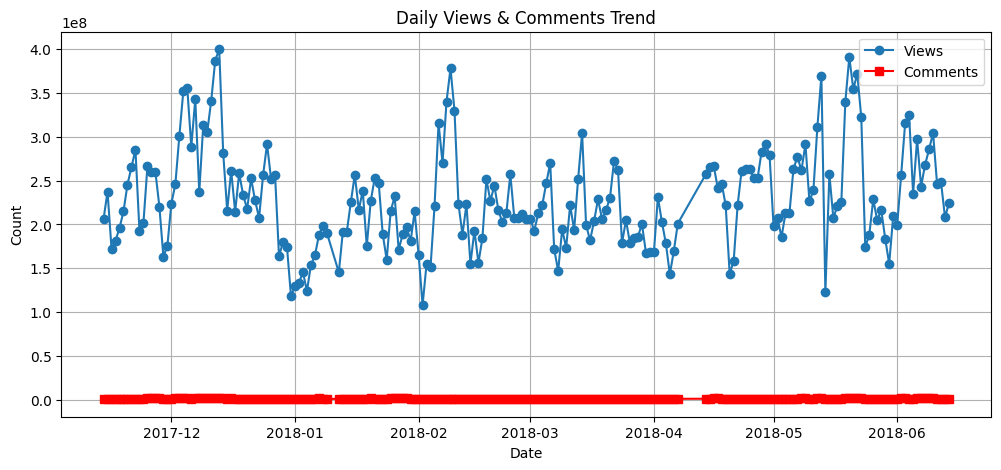

In [19]:
# Group data by date
daily_views = df.groupby("trending_date")["views"].sum()
daily_comments = df.groupby("trending_date")["comment_count"].sum()

#  Plot Daily Views & Comments
plt.figure(figsize=(12, 5))
plt.plot(daily_views.index, daily_views.values, marker='o', label="Views")
plt.plot(daily_comments.index, daily_comments.values, marker='s', label="Comments", color='red')
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Daily Views & Comments Trend")
plt.legend()
plt.grid()
plt.show()


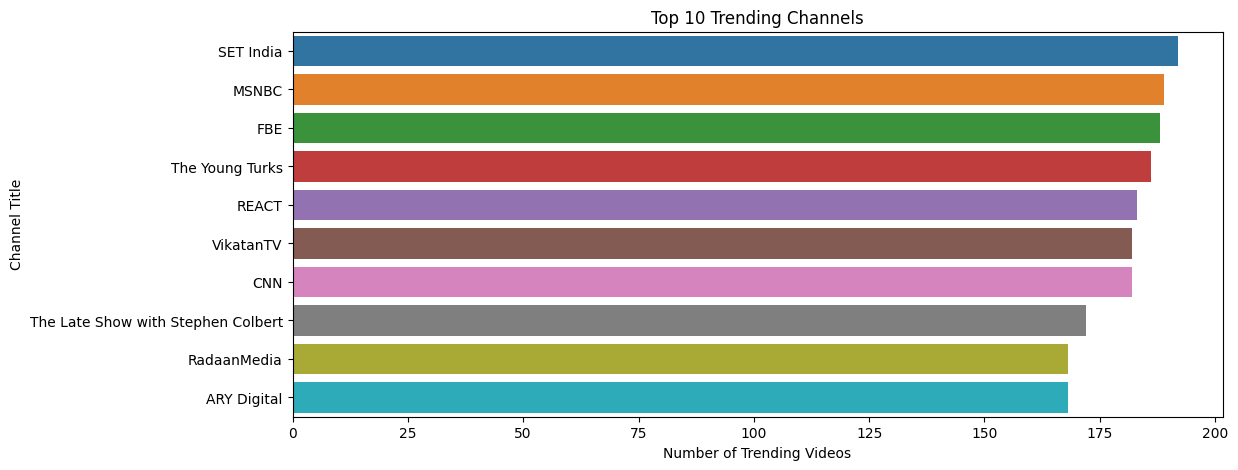

In [24]:
# Count number of trending videos per channel
channel_counts = df["channel_title"].value_counts().head(10)

# Plot Top 10 Channels with Most Trending Videos
plt.figure(figsize=(12, 5))
sns.barplot(x=channel_counts.values, y=channel_counts.index, hue=channel_counts.index, dodge=False, legend=False)
plt.xlabel("Number of Trending Videos")
plt.ylabel("Channel Title")
plt.title("Top 10 Trending Channels")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


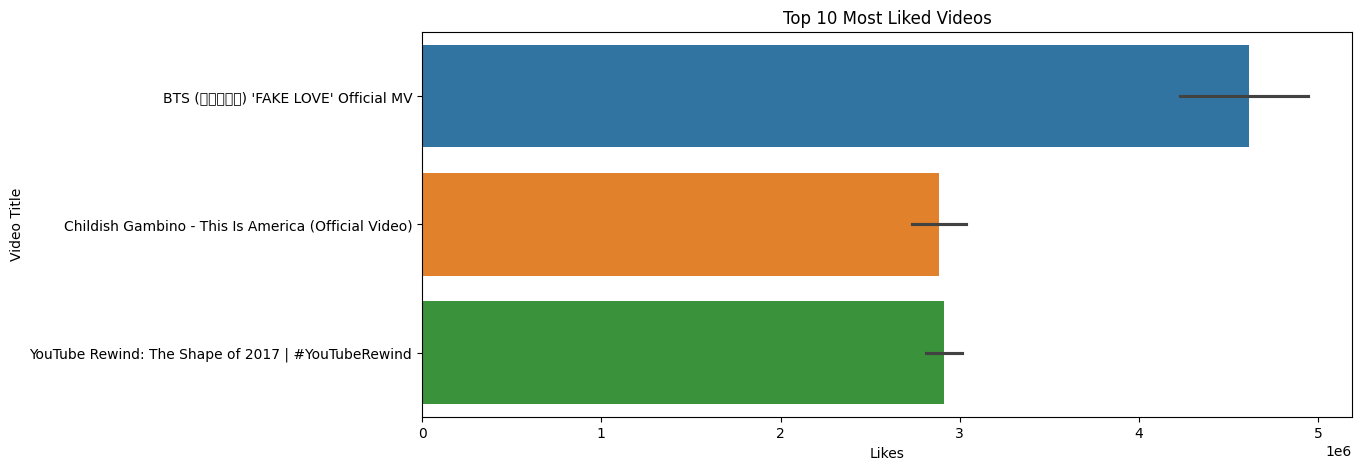

In [25]:
# Top 10 Most Liked Videos
top_liked = df.nlargest(10, "likes")[["title", "likes"]]

plt.figure(figsize=(12, 5))
sns.barplot(y=top_liked["title"], x=top_liked["likes"], hue=top_liked["title"], dodge=False, legend=False)
plt.xlabel("Likes")
plt.ylabel("Video Title")
plt.title("Top 10 Most Liked Videos")
plt.show()


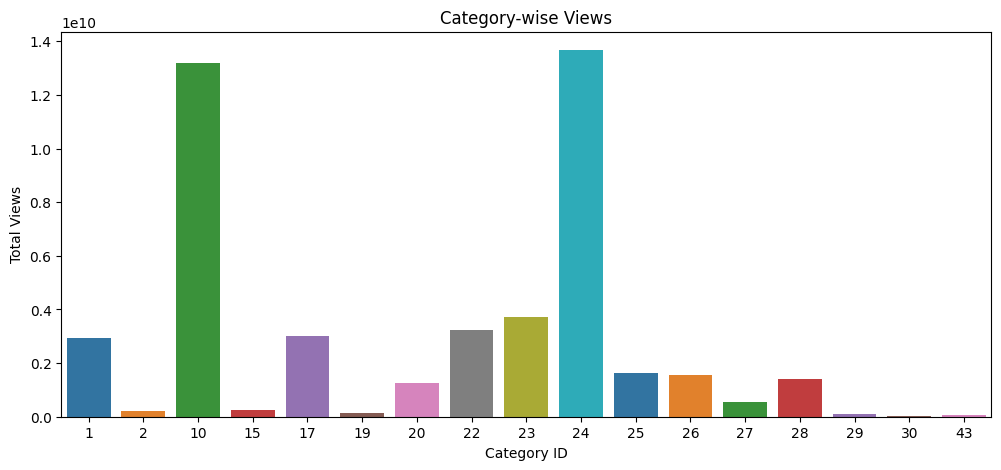

In [28]:
# Group data by category_id
category_views = df.groupby("category_id")["views"].sum().sort_values(ascending=False)

# Plot Category-wise Views
plt.figure(figsize=(12, 5))
sns.barplot(x=category_views.index, y=category_views.values, hue=category_views.index, dodge=False, legend=False, palette="tab10")
plt.xlabel("Category ID")
plt.ylabel("Total Views")
plt.title("Category-wise Views")
plt.show()
